In [1]:
import pandas as pd
import xgboost as xgb

In [2]:
df = pd.read_csv('sb_30-05_slim_slim-1.csv')

In [3]:
df.head()

,x,y,goalkeeper_dx,goalkeeper_dy,opposition_1_dx,opposition_1_dy,opposition_2_dx,opposition_2_dy,opposition_3_dx,opposition_3_dy,...,shot_one_on_one,shot_outcome,shot_technique,shot_statsbomb_xg,shot_type,under_pressure,prev_type,goal,prev_x,prev_y
0,100.4,35.1,18.0,3.4,1.5,0.0,5.0,-3.6,6.8,3.0,...,False,Blocked,Normal,0.056644,Open Play,False,Ball Recovery,False,101.7,35.6
1,114.6,33.5,3.7,2.9,-0.3,1.1,-1.6,3.6,0.0,5.6,...,False,Saved,Normal,0.143381,Open Play,True,Pass,False,111.0,69.2
2,106.2,55.8,12.0,-12.9,2.7,3.9,2.9,-5.0,2.7,-9.6,...,False,Blocked,Normal,0.038188,Open Play,False,Ball Recovery,False,105.8,56.5
3,113.9,47.4,5.0,-5.5,0.2,-1.0,-0.7,-0.8,-0.9,-2.3,...,False,Blocked,Normal,0.052781,Open Play,False,Pass,False,120.0,0.1
4,89.2,42.5,27.7,-2.4,2.7,1.3,3.1,-1.9,1.9,9.0,...,False,Blocked,Normal,0.021272,Open Play,True,Carry,False,87.6,46.0


In [4]:
print(list(df.columns))

['x', 'y', 'goalkeeper_dx', 'goalkeeper_dy', 'opposition_1_dx', 'opposition_1_dy', 'opposition_2_dx', 'opposition_2_dy', 'opposition_3_dx', 'opposition_3_dy', 'opposition_4_dx', 'opposition_4_dy', 'teammate_1_dx', 'teammate_1_dy', 'teammate_2_dx', 'teammate_2_dy', 'goalkeeper_x', 'goalkeeper_y', 'opposition_1_x', 'opposition_1_y', 'opposition_2_x', 'opposition_2_y', 'opposition_3_x', 'opposition_3_y', 'opposition_4_x', 'opposition_4_y', 'teammate_1_x', 'teammate_1_y', 'teammate_2_x', 'teammate_2_y', 'play_pattern', 'shot_aerial_won', 'shot_body_part', 'shot_first_time', 'shot_one_on_one', 'shot_outcome', 'shot_technique', 'shot_statsbomb_xg', 'shot_type', 'under_pressure', 'prev_type', 'goal', 'prev_x', 'prev_y']


In [5]:
sb_labs = df['shot_statsbomb_xg'].values
y = df['goal'].values

print(f"sb_labs shape: {sb_labs.shape}, y shape: {y.shape}")

sb_labs shape: (77617,), y shape: (77617,)


In [6]:
df.drop(['shot_body_part', 'shot_technique', 'shot_outcome', 'goal', 'shot_statsbomb_xg'], axis = 1, inplace = True)

In [7]:
print(list(df.columns))

['x', 'y', 'goalkeeper_dx', 'goalkeeper_dy', 'opposition_1_dx', 'opposition_1_dy', 'opposition_2_dx', 'opposition_2_dy', 'opposition_3_dx', 'opposition_3_dy', 'opposition_4_dx', 'opposition_4_dy', 'teammate_1_dx', 'teammate_1_dy', 'teammate_2_dx', 'teammate_2_dy', 'goalkeeper_x', 'goalkeeper_y', 'opposition_1_x', 'opposition_1_y', 'opposition_2_x', 'opposition_2_y', 'opposition_3_x', 'opposition_3_y', 'opposition_4_x', 'opposition_4_y', 'teammate_1_x', 'teammate_1_y', 'teammate_2_x', 'teammate_2_y', 'play_pattern', 'shot_aerial_won', 'shot_first_time', 'shot_one_on_one', 'shot_type', 'under_pressure', 'prev_type', 'prev_x', 'prev_y']


In [8]:
df_1h = pd.get_dummies(df, columns = ['play_pattern', 'shot_aerial_won', 'shot_first_time', 
                                      'shot_one_on_one', 'shot_type', 'under_pressure', 'prev_type'])

In [9]:
df_1h.head()

,x,y,goalkeeper_dx,goalkeeper_dy,opposition_1_dx,opposition_1_dy,opposition_2_dx,opposition_2_dy,opposition_3_dx,opposition_3_dy,...,prev_type_Clearance,prev_type_Dispossessed,prev_type_Dribble,prev_type_Duel,prev_type_Foul Won,prev_type_Interception,prev_type_Miscontrol,prev_type_Pass,prev_type_Pressure,prev_type_Shot
0,100.4,35.1,18.0,3.4,1.5,0.0,5.0,-3.6,6.8,3.0,...,0,0,0,0,0,0,0,0,0,0
1,114.6,33.5,3.7,2.9,-0.3,1.1,-1.6,3.6,0.0,5.6,...,0,0,0,0,0,0,0,1,0,0
2,106.2,55.8,12.0,-12.9,2.7,3.9,2.9,-5.0,2.7,-9.6,...,0,0,0,0,0,0,0,0,0,0
3,113.9,47.4,5.0,-5.5,0.2,-1.0,-0.7,-0.8,-0.9,-2.3,...,0,0,0,0,0,0,0,1,0,0
4,89.2,42.5,27.7,-2.4,2.7,1.3,3.1,-1.9,1.9,9.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_1h.shape

(77617, 66)

In [11]:
print(list(df_1h.columns))

['x', 'y', 'goalkeeper_dx', 'goalkeeper_dy', 'opposition_1_dx', 'opposition_1_dy', 'opposition_2_dx', 'opposition_2_dy', 'opposition_3_dx', 'opposition_3_dy', 'opposition_4_dx', 'opposition_4_dy', 'teammate_1_dx', 'teammate_1_dy', 'teammate_2_dx', 'teammate_2_dy', 'goalkeeper_x', 'goalkeeper_y', 'opposition_1_x', 'opposition_1_y', 'opposition_2_x', 'opposition_2_y', 'opposition_3_x', 'opposition_3_y', 'opposition_4_x', 'opposition_4_y', 'teammate_1_x', 'teammate_1_y', 'teammate_2_x', 'teammate_2_y', 'prev_x', 'prev_y', 'play_pattern_From Corner', 'play_pattern_From Counter', 'play_pattern_From Free Kick', 'play_pattern_From Goal Kick', 'play_pattern_From Keeper', 'play_pattern_From Kick Off', 'play_pattern_From Throw In', 'play_pattern_Other', 'play_pattern_Regular Play', 'shot_aerial_won_False', 'shot_aerial_won_True', 'shot_first_time_False', 'shot_first_time_True', 'shot_one_on_one_False', 'shot_one_on_one_True', 'shot_type_Corner', 'shot_type_Free Kick', 'shot_type_Open Play', 'und

In [12]:
y.shape

(77617,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, sb_train, sb_test = train_test_split(
    df_1h, y, sb_labs, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [15]:
import hyperopt
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

In [16]:
from xgboost import XGBClassifier
def objective(params):
    
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    
    xgb_c = XGBClassifier(**params)
    auc = cross_val_score(xgb_c, X_train_scaled, y_train, cv=5, scoring='roc_auc').mean()
    return {'loss': -auc, 'status': STATUS_OK}

In [17]:
import numpy as np
booster_list = ['gbtree', 'gblinear', 'dart']

sampling_m_list = ['uniform', 'gradient_based']

tree_m_list = ['auto', 'exact', 'approx', 'hist']

objective_list = ['binary:logistic', 'binary:logitraw', 'binary:hinge']

eval_metric_list = ['rmse', 'rmsle', 'mae', 'mape',
                    'mphe', 'logloss', 'error', 'error@t',
                    'merror', 'auc', 'aucpr', 'pre',
                    'ndcg', 'map', 'poisson-nloglik',
                    'gamma-nloglik', 'cox-nloglik',
                    'gamma-deviance', 'tweedie-nloglik',
                    'aft-nloglik', 'interval-regression-accuracy']

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 990, 1),
    'learning_rate': hp.uniform('learning_rate', 0, 1),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'objective' : hp.choice('objective', objective_list)
}

In [18]:
trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

print(best)

100%|█████████████████████████████████████████████| 100/100 [31:26<00:00, 18.86s/trial, best loss: -0.7961638007081466]
{'learning_rate': 0.030061403003937115, 'max_depth': 4.0, 'n_estimators': 373.0, 'objective': 0}


In [15]:
import numpy as np
print(np.arange(0,1,0.1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV




param_grid = {
    #'learning_rate' : np.arange(0,1.1, 0.1),
    #'gamma' : np.arange(0,10, 1),
    #'max_depth' : np.arange(0,10,1),
    #'min_child_weight' : np.arange(0,20,1),
    #'max_delta_step' : np.arange(0,20,1),
    #'subsample' : np.arange(0,1.1,0.1),
    #'sampling_method' : sampling_m_list,
    #'lambda' : np.arange(0,20,1),
    #'alpha' : np.arange(0,20,1),
    #'tree_method' : tree_m_list,
    #'max_leaves': np.arange(0,200,20),
    #'max_bin' : np.arange(20,500, 10),
    #'num_parrallel_tree' : np.arange(1,20,1)
    #'n_estimators' : np.arange(50,1000,10)
    
}

#grid_search = GridSearchCV(XGBClassifier(learning_rate = 0.1, max_depth=4, objective='binary:logistic', n_estimators = 260), param_grid, cv = 10)
#grid_search.fit(X_train_scaled,y_train)
#print(f"Best params: {grid_search.best_params_}")
#print(f"Best Cross Val Score: {grid_search.best_score_}")

In [34]:
from xgboost import XGBClassifier


#xgb_classifier = XGBClassifier(learning_rate = 0.1, max_depth=4, objective='binary:logistic', n_estimators = 260)
xgb_classifier = XGBClassifier(learning_rate = 0.06436966529587, max_depth=3, objective='binary:logistic', n_estimators = 270)
#xgb_classifier = XGBClassifier(learning_rate = 0.030061403003937115, max_depth = 4, n_estimators = 373)

xgb_classifier.fit(X_train_scaled, y_train)

y_pred = xgb_classifier.predict(X_test_scaled)

y_pred_probs = xgb_classifier.predict_proba(X_test_scaled)

In [35]:
print(df_1h.columns[3])

goalkeeper_dy


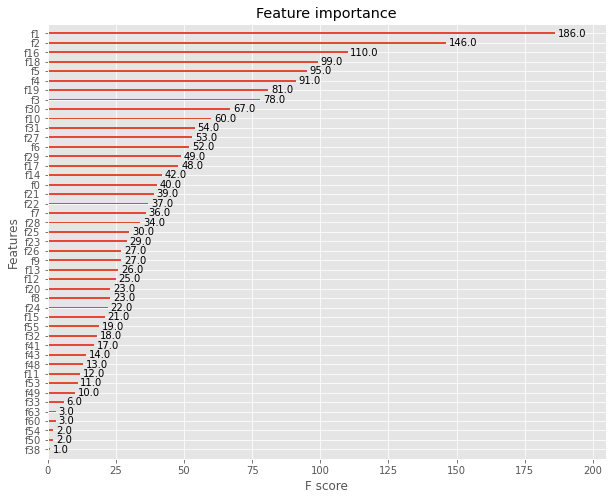

In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(xgb_classifier, ax =ax)
plt.show()

In [37]:
from sklearn import metrics 

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.99      0.95     17580
        True       0.60      0.12      0.20      1825

    accuracy                           0.91     19405
   macro avg       0.76      0.56      0.58     19405
weighted avg       0.89      0.91      0.88     19405



In [38]:
from sklearn.metrics import log_loss

y_test_conv = y_test.astype(int)

logloss_model = log_loss(y_test_conv, y_pred_probs[:,1])
logloss_sb = log_loss(y_test_conv, sb_test)

print(f"Model Log Loss: {logloss_model}")
print(f"Statsbomb Log Loss: {logloss_sb}")

Model Log Loss: 0.25615461289051045
Statsbomb Log Loss: 0.25385731116418275


In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test_conv, y_pred_probs[:,1])
roc_auc_sb = roc_auc_score(y_test_conv, sb_test)
print(f"My model: {roc_auc}")
print(f"SB: {roc_auc_sb}")

My model: 0.7932973335203454
SB: 0.7993221281967366


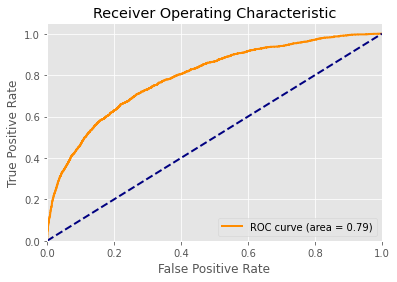

In [22]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')

roc_auc = roc_auc_score(y_test_conv, y_pred_probs[:,1])

fpr, tpr, _ = roc_curve(y_test_conv, y_pred_probs[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

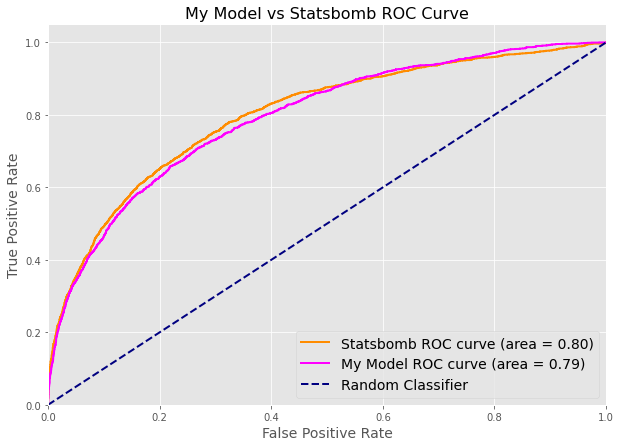

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')


roc_auc_sb = roc_auc_score(y_test_conv, sb_test)

fpr_sb, tpr_sb, _ = roc_curve(y_test_conv, sb_test)
plt.figure(figsize = (10,7))
plt.plot(fpr_sb, tpr_sb, color='darkorange', lw=2, label=f'Statsbomb ROC curve (area = {roc_auc_sb:.2f})')
plt.plot(fpr, tpr, color='#FF00FF', lw=2, label=f'My Model ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('My Model vs Statsbomb ROC Curve', fontsize = 16)
plt.legend(loc='lower right', fontsize = 14)
plt.savefig('06-06_attempt.png', dpi = 1000, facecolor = 'white', bbox_inches = 'tight')
plt.show()


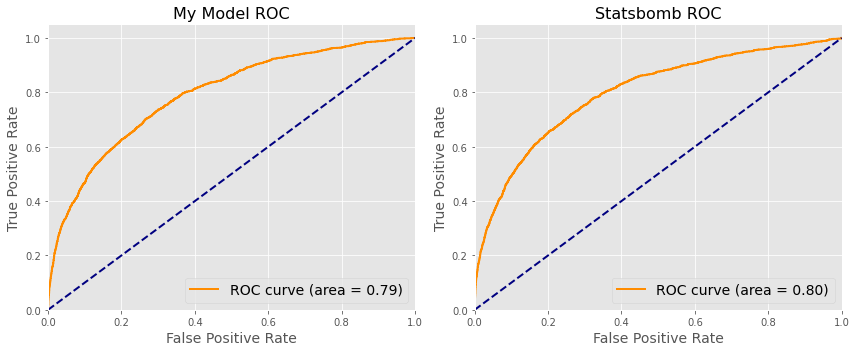

In [23]:


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First ROC curve
roc_auc = roc_auc_score(y_test_conv, y_pred_probs[:,1])
fpr, tpr, _ = roc_curve(y_test_conv, y_pred_probs[:, 1])

ax[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate', fontsize = 14)
ax[0].set_ylabel('True Positive Rate', fontsize = 14)
ax[0].set_title('My Model ROC', fontsize = 16)
ax[0].legend(loc='lower right', fontsize = 14)

# Second ROC curve
roc_auc_sb = roc_auc_score(y_test_conv, sb_test)
fpr, tpr, _ = roc_curve(y_test_conv, sb_test)

ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_sb:.2f})')
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate', fontsize = 14)
ax[1].set_ylabel('True Positive Rate', fontsize = 14)
ax[1].set_title('Statsbomb ROC', fontsize = 16)
ax[1].legend(loc='lower right', fontsize = 14)

# Show plot
plt.tight_layout()
plt.show()


In [24]:
y[:40]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [31]:

fn_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_test, y_pred)) if true_label == True and pred_label == False]

fn_fts = X_test.iloc[fn_indices]

In [33]:
fn_fts

,x,y,goalkeeper_dx,goalkeeper_dy,opposition_1_dx,opposition_1_dy,opposition_2_dx,opposition_2_dy,opposition_3_dx,opposition_3_dy,...,prev_type_Clearance,prev_type_Dispossessed,prev_type_Dribble,prev_type_Duel,prev_type_Foul Won,prev_type_Interception,prev_type_Miscontrol,prev_type_Pass,prev_type_Pressure,prev_type_Shot
13215,118.2,36.0,0.9,4.4,-0.7,-0.4,-0.1,3.9,-0.4,9.6,...,0,0,0,0,0,0,0,1,0,0
65933,114.3,46.3,4.7,-6.1,-2.4,-2.0,-1.9,-3.5,-4.4,-5.9,...,0,0,0,0,0,0,0,1,0,0
24573,116.2,36.1,0.2,3.0,0.1,-4.5,0.4,5.3,2.7,6.5,...,0,0,0,0,0,0,0,0,0,0
3181,108.9,38.1,10.4,1.8,1.4,-0.5,-0.3,5.2,1.4,8.0,...,0,0,0,0,0,0,0,1,0,0
53103,104.0,47.0,14.0,-3.0,3.0,0.0,1.0,-4.0,-6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13964,114.7,46.7,4.7,-3.7,-0.2,-1.5,4.1,-9.1,-13.4,-7.8,...,0,0,0,0,0,0,0,0,0,0
56673,108.1,25.7,9.2,13.4,0.8,0.9,-0.8,2.1,1.8,10.5,...,0,0,0,0,0,0,0,1,0,0
50178,118.0,42.5,1.1,0.1,2.0,-0.6,-3.2,1.2,1.7,-3.0,...,0,0,0,0,0,0,0,0,0,0
9809,116.5,44.2,2.4,-2.3,-2.9,-1.1,-2.0,4.0,-1.2,-5.3,...,0,0,0,0,0,0,0,1,0,0
